## Import Libraries

In [115]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score


In [116]:
# Importing additional libraries

import warnings
warnings.filterwarnings("ignore")

In [117]:
# Loading the dataset

df = pd.read_csv("digital_marketing_campaign_dataset.csv")

In [118]:
# Display the first few rows of the dataset

df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


## Data Preprocessing

In [119]:
# Checking the total rows and columns

df.shape

(8000, 20)

In [120]:
# Checking for null values

print(df.isnull().sum())

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64


In [121]:
# Inspecting the datatypes

df.dtypes.value_counts()

int64      10
object      5
float64     5
Name: count, dtype: int64

In [122]:
# Checking for duplicate rows

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)


Duplicate Rows: 0


In [123]:
# Basic statistical summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


In [124]:
# Droping the unnecessary columns

df.drop(columns = ["CustomerID", "AdvertisingPlatform", "AdvertisingTool"], inplace = True)
df

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,0
7996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,0
7997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,1
7998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,1


## Encoding Categorical Variables

In [125]:
label_encoder = LabelEncoder()
categorical_columns = ["Gender", "CampaignChannel", "CampaignType"]
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

## EDA

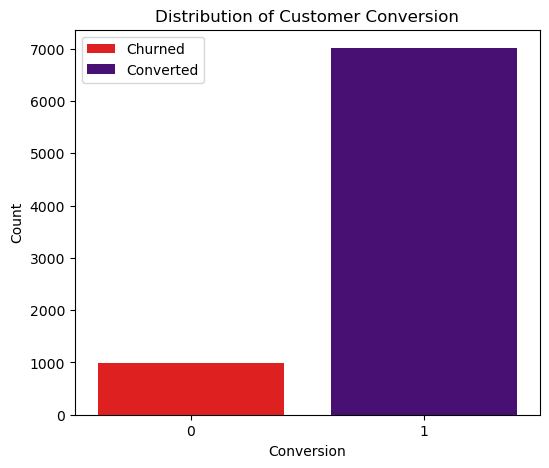

In [126]:
# Visualize the distribution of the target variable

plt.figure(figsize=(6,5))
sns.countplot(x = df["Conversion"], palette = ["Red", "Indigo"])
plt.xlabel("Conversion", fontsize = 10, color = "Black")
plt.ylabel("Count", fontsize = 10, color = "Black")
plt.title("Distribution of Customer Conversion", fontsize = 12, color = "Black")
plt.legend(labels=["Churned", "Converted"])
plt.show()

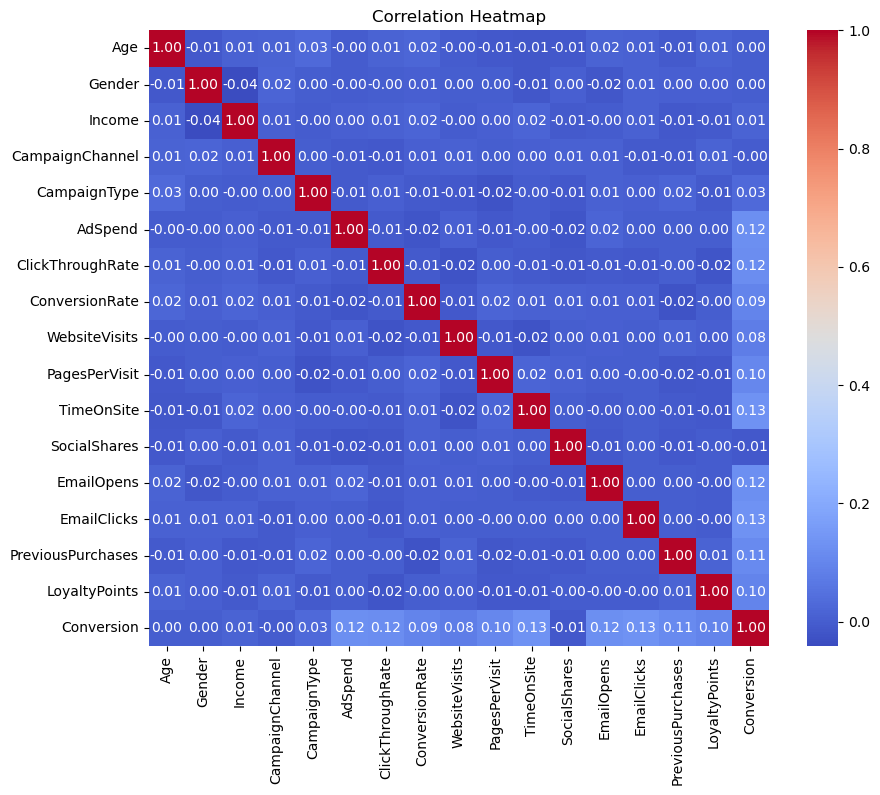

In [127]:
# Correlation Heatmap

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

In [128]:
# Define features and Target variable 

X = df.drop("Conversion", axis = 1)
y = df["Conversion"]

In [129]:
# Split the data into Training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [130]:
# standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training and Testing

In [131]:
# Logistic Regression

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_y_pred)
print(f"Logistic Regression accuracy: {log_accuracy: .2f}")

Logistic Regression accuracy:  0.89


In [132]:
# Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.84


In [133]:
# Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.90


In [134]:
# Gradient Boosting Classifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

Gradient Boosting Accuracy: 0.92


## Model Evaluation

In [135]:
# Function to calculate and print metrics

def evaluate_model(name, y_test, y_pred, y_pred_prob=None):
    print(f"\n{name} Metrics:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    if y_pred_prob is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.2f}\n")

In [136]:
# Logistic Regression
evaluate_model("Logistic Regression", y_test, log_y_pred, log_model.predict_proba(X_test)[:, 1])

# Classification Report
classification_rep = classification_report(y_test, log_y_pred)
print("\nClassification Report:")
print(classification_rep)



Logistic Regression Metrics:

Accuracy: 0.89
Precision: 0.90
Recall: 0.99
F1 Score: 0.94
ROC-AUC: 0.79


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.16      0.27       291
           1       0.90      0.99      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.79      0.58      0.60      2400
weighted avg       0.87      0.89      0.86      2400



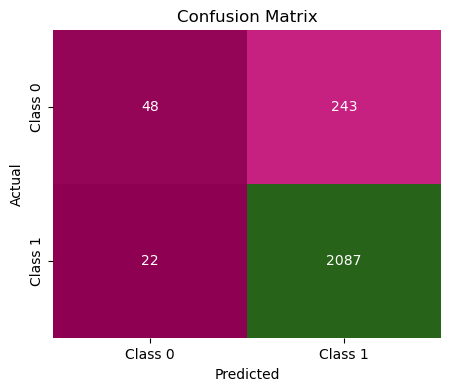

In [137]:
# Confusion Matrix 
confusion = confusion_matrix(y_test, log_y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="PiYG", cbar=False, 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

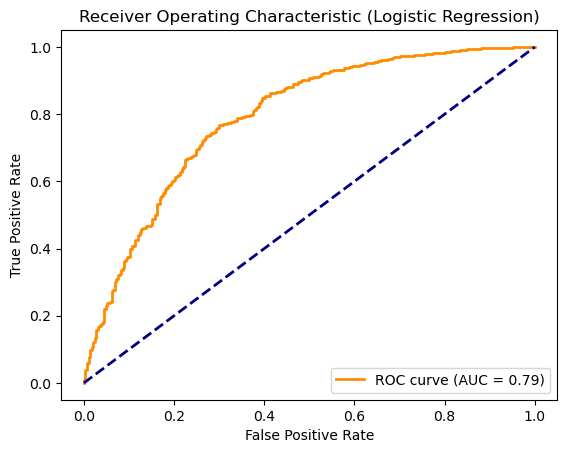

In [138]:
# ROC Curve and AUC 
log_y_pred_prob = log_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, log_y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, log_y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Logistic Regression)")
plt.legend(loc="lower right")
plt.show()

In [139]:
# Decision Tree
evaluate_model("Decision Tree", y_test, dt_y_pred, dt_model.predict_proba(X_test)[:, 1])

# Classification Report
classification_rep = classification_report(y_test, dt_y_pred)
print("\nClassification Report:")
print(classification_rep)


Decision Tree Metrics:

Accuracy: 0.84
Precision: 0.92
Recall: 0.90
F1 Score: 0.91
ROC-AUC: 0.65


Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.40      0.37       291
           1       0.92      0.90      0.91      2109

    accuracy                           0.84      2400
   macro avg       0.63      0.65      0.64      2400
weighted avg       0.85      0.84      0.84      2400



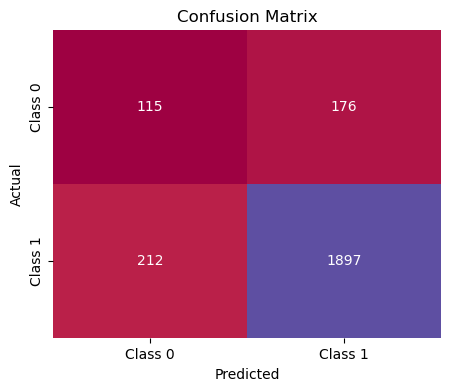

In [140]:
# Confusion Matrix 
confusion = confusion_matrix(y_test, dt_y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Spectral", cbar=False, 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

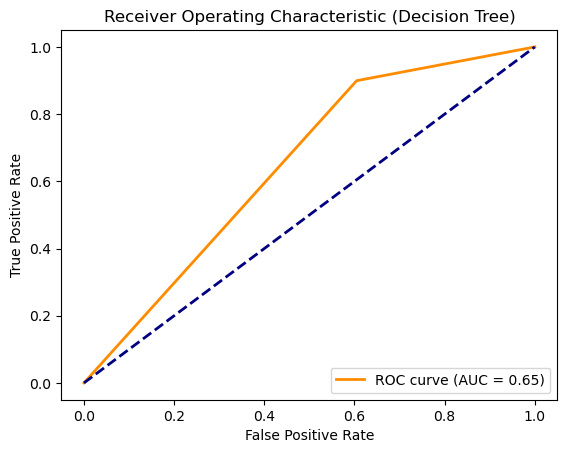

In [141]:
# ROC Curve and AUC 
dt_y_pred_prob = dt_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, dt_y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, dt_y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Decision Tree)")
plt.legend(loc="lower right")
plt.show()

In [142]:
# Random Forest
evaluate_model("Random Forest", y_test, rf_y_pred, rf_model.predict_proba(X_test)[:, 1])

# Classification Report
classification_rep = classification_report(y_test, rf_y_pred)
print("\nClassification Report:")
print(classification_rep)


Random Forest Metrics:

Accuracy: 0.90
Precision: 0.90
Recall: 1.00
F1 Score: 0.94
ROC-AUC: 0.81


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.18      0.29       291
           1       0.90      1.00      0.94      2109

    accuracy                           0.90      2400
   macro avg       0.87      0.59      0.62      2400
weighted avg       0.89      0.90      0.87      2400



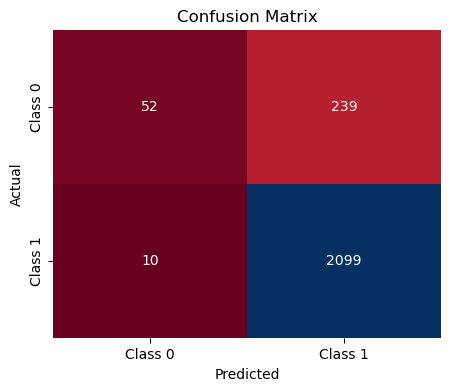

In [143]:
# Confusion Matrix 
confusion = confusion_matrix(y_test, rf_y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="RdBu", cbar=False, 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

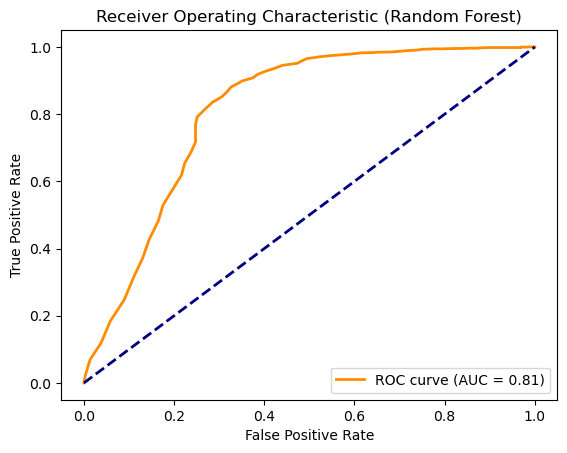

In [144]:
# ROC Curve and AUC for Random Forest
rf_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, rf_y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Random Forest)")
plt.legend(loc="lower right")
plt.show()

In [145]:
# Gradient Boosting
evaluate_model("Gradient Boosting", y_test, gb_y_pred, gb_model.predict_proba(X_test)[:, 1])

# Classification Report
classification_rep = classification_report(y_test, gb_y_pred)
print("\nClassification Report:")
print(classification_rep)


Gradient Boosting Metrics:

Accuracy: 0.92
Precision: 0.92
Recall: 0.99
F1 Score: 0.96
ROC-AUC: 0.84


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.40      0.55       291
           1       0.92      0.99      0.96      2109

    accuracy                           0.92      2400
   macro avg       0.90      0.69      0.75      2400
weighted avg       0.92      0.92      0.91      2400



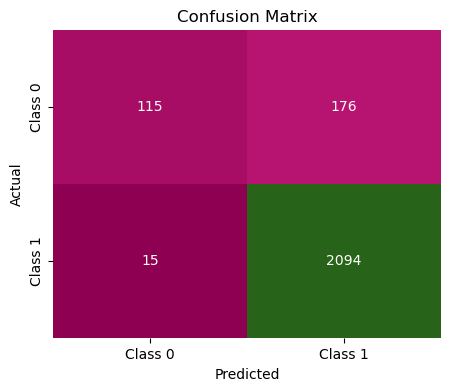

In [146]:
# Confusion Matrix 
confusion = confusion_matrix(y_test, gb_y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="PiYG", cbar=False, 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

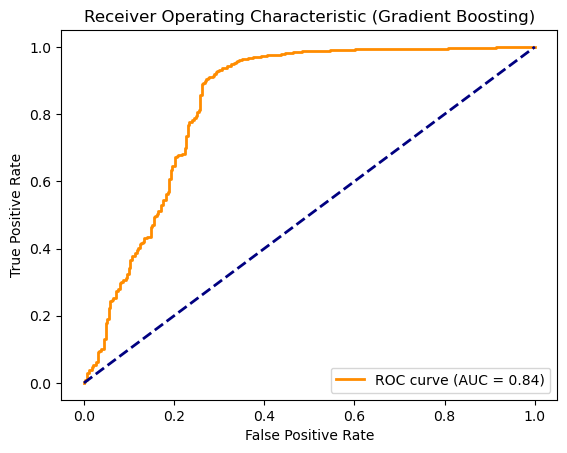

In [147]:
# ROC Curve and AUC 
gb_y_pred_prob = gb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, gb_y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, gb_y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Gradient Boosting)")
plt.legend(loc="lower right")
plt.show()

## Comparison of Models

In [148]:
print("\nModel Comparison:\n")
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Model Comparison:

Logistic Regression Accuracy: 0.89
Decision Tree Accuracy: 0.84
Random Forest Accuracy: 0.90
Gradient Boosting Accuracy: 0.92


In [150]:
print("\nModel Comparison:\n")
print(f"Logistic Regression Precision: {log_precision:.2f}")
print(f"Decision Tree Precision: {dt_precision:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Gradient Boosting Precision: {gb_precision:.2f}")


Model Comparison:



NameError: name 'log_precision' is not defined